In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel('ex1.xlsx')
original_amplitude = data['Amplitude'].values
noised_amplitude = data['Amplitude_noise'].values


C:\Users\Spandana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.preprocessing import MinMaxScaler

original_amplitude = original_amplitude.reshape(-1, 1)
noised_amplitude = noised_amplitude.reshape(-1, 1)

scaler = MinMaxScaler()
original_amplitude = scaler.fit_transform(original_amplitude)
noised_amplitude = scaler.transform(noised_amplitude)

In [3]:
import numpy as np

window_size = 4500

def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i + window_size])
    return np.array(windows)

X = create_windows(noised_amplitude, window_size)
y = create_windows(original_amplitude, window_size)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D

input_signal = Input(shape=(window_size, 1))

x = Conv1D(16, 3, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='relu', padding='same')(x)

autoencoder = Model(input_signal, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4500, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 4500, 16)            │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2250, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2250, 8)             │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1125, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1125, 8)             │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d (UpSampling1D)         │ (None, 2250, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2250, 16)            │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_1 (UpSampling1D)       │ (None, 4500, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 4500, 1)             │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,105 (4.32 KB)

 Trainable params: 1,105 (4.32 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
X_train = X.reshape(-1, window_size, 1)
y_train = y.reshape(-1, window_size, 1)

autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.2809 - val_loss: 0.2269
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.2015 - val_loss: 0.1433
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1215 - val_loss: 0.0743
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0642 - val_loss: 0.0517
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0515 - val_loss: 0.0456
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0424 - val_loss: 0.0334
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0317 - val_loss: 0.0260
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0230 - val_loss: 0.0152
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0134 - val_loss: 0.0072
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0062 - val_loss: 0.0033
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0027 - val_loss: 0.0026


In [6]:
denoised_signal = autoencoder.predict(X_train)

denoised_signal = denoised_signal.reshape(-1, 1)
denoised_signal = scaler.inverse_transform(denoised_signal)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [7]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter to denoised signal
window_size = 11  # Must be odd
poly_order = 3  # Polynomial order

denoised_signal_smoothed = savgol_filter(denoised_signal.flatten(), window_size, poly_order)

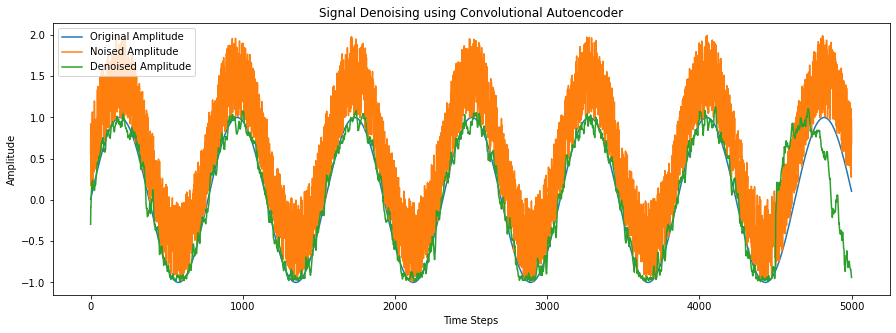

In [8]:
import matplotlib.pyplot as plt

# Assuming the data is sequential and each point represents a time step

# Generate a sequence index for the x-axis
time_steps = np.arange(len(data))

# Plot the signals
plt.figure(figsize=(15, 5))

plt.plot(time_steps, data['Amplitude'], label='Original Amplitude')
plt.plot(time_steps, data['Amplitude_noise'], label='Noised Amplitude')
plt.plot(time_steps, denoised_signal.flatten()[:len(data)], label='Denoised Amplitude')

plt.xlabel('Time Steps')  # or 'Sample Index'
plt.ylabel('Amplitude')
plt.title('Signal Denoising using Convolutional Autoencoder')
plt.legend()

plt.show()